#### 1.

In [1]:
class Hero():
    
    """ Class to create Hero for our game """
    
    def __init__(self, name, level, race):
        
        """ Initiate our hero """
        
        self.name = name 
        self.level = level
        self.race = race
        self.health = 100
        
    def show_hero(self):
        
        """ Print parameters of Hero """
        
        description = ("Name of hero is " + self.name + ", level is " + str(self.level) + "!")
        print(description)
    
    def level_up(self):
        
        """ Upgrade level of hero """
        
        self.level += 1

In [2]:
my_hero_1 = Hero("Jake", 1, "Orc")

my_hero_1.show_hero()

Name of hero is Jake, level is 1!


In [3]:
my_hero_1.level_up()
my_hero_1.show_hero()

Name of hero is Jake, level is 2!


#### 2. 

In [10]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

In [37]:
class RNA():
    
    """ Create RNA sequence """
    
    def __init__(self, rna):
        
        """ Create RNA sequence """
        
        self.rna = rna
    
    def translation(self):
        
        """ Translate RNA into protein """
        
        messenger_rna = Seq(self.rna, IUPAC.unambiguous_rna)
        print(messenger_rna.translate())
    
    def return_transpition(self):
        
        """ Receive DNA sequence by back-transcription """
        
        messenger_rna = Seq(self.rna, IUPAC.unambiguous_rna)
        print(messenger_rna.back_transcribe())
    
    
seq = RNA('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')

In [38]:
RNA.translation(seq)

MAIVMGR*KGAR*


In [39]:
RNA.return_transpition(seq)

ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


#### 3.

In [80]:
class positive(set):
    
    def __init__(self, *numbers):
        s = []
        for elem in numbers:
            if elem > 0:
                s.append(elem)
        super().__init__(s)
    
    def add(self, elem):
        if elem > 0:
            super().add(elem)

In [81]:
xs = positive(1, 3, 4)
xs

{1, 3, 4}

In [82]:
xs.add(-5)
xs

{1, 3, 4}

#### 4. 

In [237]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt
from collections import defaultdict

In [278]:
class Fasta_statistics():
    
    """ Class return statistics about input fasta file """
    
    def __init__(self, path):
        
        self.path = path
    
    def seq_value(self):
        
        """ Return the number of sequences in the fasta file """
        
        kol = 0
        for seq_record in SeqIO.parse(self.path, "fasta"):
            kol += 1  
        print('The nubmer of sequences in the fasta file is', kol)
    
    def histo(self):
        
        """ Create a histogram of sequence lengths """
        
        length = []
        for seq_record in SeqIO.parse(self.path, "fasta"):
            length.append(len(seq_record.seq))
            
        x = range(len(length))
        ax = plt.gca()
        ax.bar(x, length, align='edge')
        plt.show()
        
    def gc(self):
        
        """ Receive a list of GC content for sequences in fasta file """
        
        gc_list = []
        for seq_record in SeqIO.parse(self.path, "fasta"):
            gc_list.append(GC(seq_record.seq))
        print(gc_list)
        
    def histo_k_mer(self, list_k_mer):
        
        result_dict = defaultdict(list)
        for elem in list_k_mer:
            result_dict[elem] = 0
        
        for seq_record in SeqIO.parse(self.path, "fasta"):
            
            for elem in list_k_mer:
                
                for i in range(len(seq_record.seq)):
                    
                    if seq_record.seq[i:i+4] == elem:
                        result_dict[elem] += 1
        
        ax = plt.gca()
        ax.bar(list_k_mer, result_dict.values())
        plt.show()

In [279]:
pathway = r'cds.fasta'
f = Fasta_statistics(pathway)

In [231]:
f.seq_value()

The nubmer of sequences in the fasta file is 94


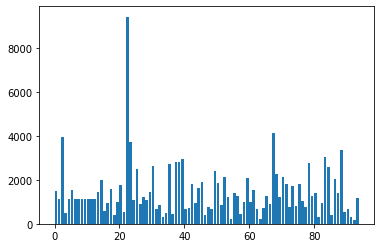

In [226]:
f.histo()

In [235]:
f.gc()

[52.275769745649264, 50.83553210202287, 61.35961587060905, 46.00389863547758, 72.56944444444444, 64.62853385930309, 72.56944444444444, 72.56944444444444, 72.56944444444444, 72.56944444444444, 72.56944444444444, 72.56944444444444, 72.56944444444444, 56.0792349726776, 82.09783156833082, 45.65972222222222, 54.12748171368861, 56.14702154626109, 52.450980392156865, 58.95153313550939, 62.049549549549546, 63.27683615819209, 63.24867724867725, 68.73655913978494, 62.73972602739726, 59.04877065699315, 54.675467546754675, 59.75308641975309, 54.93482309124767, 56.94444444444444, 60.68571428571428, 62.25266362252663, 61.17084826762246, 55.663430420711975, 53.78323108384458, 52.6431718061674, 59.50782997762864, 56.68430335097002, 55.09407170749024, 56.12621685129238, 45.982142857142854, 52.303523035230356, 57.2057205720572, 54.12647374062165, 54.33705080545229, 63.55140186915888, 52.65700483091788, 56.770833333333336, 58.40978593272171, 60.370370370370374, 57.38327904451683, 57.70609318996416, 63.56

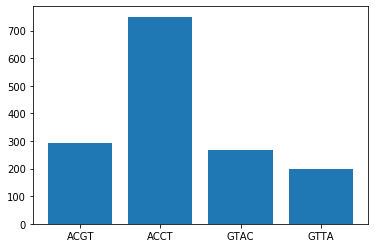

In [280]:
f.histo_k_mer(['ACGT', 'ACCT', 'GTAC', 'GTTA'])